In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10
import seaborn as sns

import tensorflow as tf
from sklearn import datasets
from tensorflow.keras.utils import to_categorical 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import  Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import Activation  

***
회귀 신경망을 이용해 보스턴 집값을 예측하는 모델을 만들어 본다.
***

In [2]:
# 일관된 결과값이 나오도록 numpy와 tensorflow의 seed를 설정한다. 
np.random.seed(0)
tf.random.set_seed(0)

***
분류 신경망에 사용할 데이터 준비
***

In [3]:
# 데이터 불러오기
raw_data = datasets.load_boston() # 사이킷런이 제공하는 와인 데이터를 불러온다.

# 피쳐, 레이블 데이터 저장
xData = raw_data.data # 피쳐 데이터를 저장한다.
yData = raw_data.target # 피쳐 데이터에 따른 레이블을 저장한다.
print(xData.shape, yData.shape)

# 총 13개의 피쳐가 있고, 이는 신경망을 생성할 때 사용된다.

# 클래스(레이블)의 종류 확인
# 클래스의 종류를 확인함으로써 분류 문제인지 회귀 문제인지 파악할 수 있고, 
# 분류 문제라면 몇가지 클래스로 구분되는지 알 수 있다. 
print(set(yData))

# 레이블 데이터 원-핫 인코딩은 분류 문제일 경우 사용하고 회귀 문제일 경우 사용하지 않는다.

# 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(xData, yData, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(506, 13) (506,)
{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3

***
시퀀스를 사용하는 회귀 신경망 생성
***

In [4]:
# 회귀 신경망 모델 학습에 사용되는 피쳐 갯수(n)와 클래스 갯수(c)를 저장한다.
#  회귀 신경망은 클래스 개수를 별도로 저장할 필요가 없다
n = x_train.shape[1]
print(f'피쳐 갯수(입력 데이터 1건(피쳐)의 차원) -> {n}')
epochs = 50

피쳐 갯수(입력 데이터 1건(피쳐)의 차원) -> 13


In [5]:
# Sequential() 객체 선언 후 Sequential 모델에 add() 메소드로 레이어를 추가해 신경망을 만든다.
model = Sequential() # 시퀀스를 사용하는 신경망 모델을 만든다.

# 입력 레이어를 만든다.
# input_dim  속성으로 입력 데이터 1건(피쳐)의 차원, units 속성으로 레이어의 출력 차원,
# activation 속성으로 활성화 함수를 지정한다.
model.add(Dense( input_dim = n, units = 20, activation = "relu" ))

# 출력 레이어를 만든다.  
# 회귀 신경망은 구분해야할 클래스 갯수만큼 units 속을 지정해야 했지만, 
# 회귀 신경망은 1건을 예측만 하기때문에 units 속성값 1로 지정하면 된다.
# 회귀 문제를 풀 때 최종 활성화 함수로 "softmax"를 사용했지만, 
# 최종 활성화 함수로 항등(선형) 함수를 사용해야 하는데, 
# 코드 상에서 최종 활성화 함수를 지정하지 않으면 항등 함수가 기본값으로 적용된다.
model.add(Dense( units = 1, activation = "linear" ))

#Dense 레이어의 Param은 [(입력 차원;갯수;13 + 바이어스;1) x 출력 차원;갯수;20]으로 계산되고, 바이어스는 레이어당 1개이다.
#BatchNormalizetion의 Param은 [입력갯수 x 4]로 계산된다.
model.summary() # 신경망 모델의 구조를 확인한다.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


***
회귀 신경망 모델 컴파일
***

In [6]:
# compile() 메소드로 생성한 신경망 모델을 컴파일 한다.
# 회귀 신경망은 loss라는 속성에 손실함수(비용함수, 오차함수)를 지정할 때  "mean_squared_error"를 지정한다.
# optimizer 속성에 최적화 함수(일반적으로 "adam";Adam Optimizer)를 지정한다.
# metrics 속성에 평가 기준을 지정한다.
model.compile(loss="mean_squared_error", optimizer="adam", metrics="mean_squared_error")

***
회귀 신경망 모델 학습
***

In [7]:
# fit() 메소드로 학습 데이터,  학습데이터에 따른 레이블, epoch 속성에 학습 횟수, batch-size 속성에 미니 배치 크기를 지정해 컴파일된 신경망 모델을 학습시킨다.
history = model.fit( x_train, y_train, epochs=epochs , batch_size=5)

Epoch 1/50
76/76 [==============================] - 0s 920us/step - loss: 1121.5302 - mean_squared_error: 1121.5302
Epoch 2/50
76/76 [==============================] - 0s 880us/step - loss: 104.8682 - mean_squared_error: 104.8682
Epoch 3/50
76/76 [==============================] - 0s 880us/step - loss: 68.5204 - mean_squared_error: 68.5204
Epoch 4/50
76/76 [==============================] - 0s 933us/step - loss: 60.5068 - mean_squared_error: 60.5068
Epoch 5/50
76/76 [==============================] - 0s 893us/step - loss: 56.8730 - mean_squared_error: 56.8730
Epoch 6/50
76/76 [==============================] - 0s 973us/step - loss: 53.6445 - mean_squared_error: 53.6445
Epoch 7/50
76/76 [==============================] - 0s 907us/step - loss: 53.7626 - mean_squared_error: 53.7626
Epoch 8/50
76/76 [==============================] - 0s 907us/step - loss: 48.1801 - mean_squared_error: 48.1801
Epoch 9/50
76/76 [==============================] - 0s 933us/step - loss: 45.4166 - mean_squared_e

In [8]:
# 모델의 epoch 단계별로 정확도와 오차 확인
print(history.history["loss"][-1]) # 모델 실행 결과에서 오차만 얻어온다.
print(history.history["mean_squared_error"][-1]) #모델 실행 결과에서 평균 제곱 오차만 얻어온다.

33.63044738769531
33.63044738769531


***
회귀 신경망 평가
***

In [9]:
# evaluate() 메소드로 테스트 데이터와 그에 따른 테스트 레이블을 넘겨서  학습된 신경망을 평가한다.
print(model.evaluate(x_test, y_test))

4/4 [==============================] - 0s 2ms/step - loss: 38.3968 - mean_squared_error: 38.3968
[38.39683532714844, 38.39683532714844]


***
학습 결과 시각화
***

In [10]:
#평균 제곱 오차 시각화
epoch = np.arange(1, (epochs + 1) )
mse = history.history["mean_squared_error"]

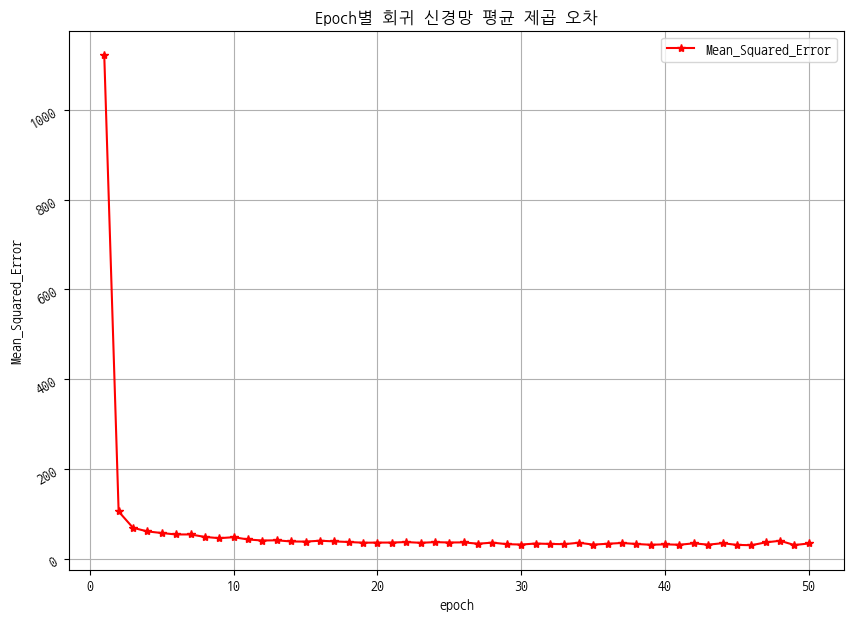

In [11]:
# 학습 정확도 시각화
plt.figure(figsize=[10, 7])
plt.plot(epoch, mse, "r*-" , label="Mean_Squared_Error")
plt.title("Epoch별 회귀 신경망 평균 제곱 오차")
plt.xlabel("epoch")
plt.ylabel("Mean_Squared_Error")
plt.legend()
plt.grid()
plt.yticks(rotation=30)
plt.show()
# 평균 제곱 오차 시각화 결과, epoch 진행 단계별로 전반적인 오차가  감소하는 것을 볼 수 있다.

In [12]:
# 테스트 데이터 실제값(레이블)을 기억하는 데이터프레임을 만든다. 
result_df = pd.DataFrame(y_test, columns=["real_value"])
result_df

,real_value
0,22.6
1,50.0
2,23.0
3,8.3
4,21.2
...,...
122,19.4
123,21.2
124,20.3
125,18.8


In [13]:
# predict() 메소드에 테스트 데이터에 피쳐값을 인수로 해 예측값을 계산한다.
predict1 = model.predict(x_test)
print(predict1.shape)

# flatten() 메소드는 배열을 무조건 1차원 배열로 변환한다.
predict = model.predict(x_test).flatten()
print(predict.shape)

4/4 [==============================] - 0s 1ms/step
(127, 1)
4/4 [==============================] - 0s 1ms/step
(127,)


In [14]:
# 데이터프레임에 예측값을 파생 변수로 추가한다.
result_df["predict_value"] = predict
result_df

,real_value,predict_value
0,22.6,21.767063
1,50.0,24.345573
2,23.0,30.402328
3,8.3,14.108766
4,21.2,20.939941
...,...,...
122,19.4,20.433929
123,21.2,22.630524
124,20.3,26.351574
125,18.8,22.245884


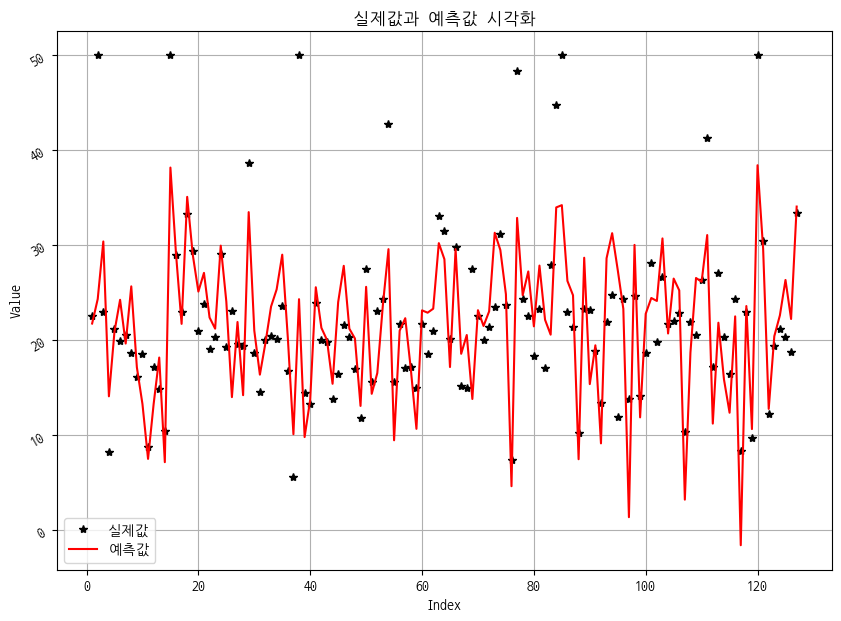

In [15]:
# 테스트 데이터의 레이블(실제값)과 예측값 시각화
plt.figure(figsize=[10, 7])
idx = np.arange(1, (len(result_df) + 1))
plt.plot(idx, result_df.real_value , "k*" ,label="실제값")
plt.plot(idx, result_df.predict_value, "r-" ,label="예측값")
plt.title("실제값과 예측값 시각화")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.yticks(rotation=30)
plt.show()
# 정확도 시각화 결과, epoch 진행 단계별로 전반적인 정확도가 상승하는 것을 볼 수 있다.

In [16]:
# 예측값을 기준으로 데이터프레임을 오름차순 정렬한다.
df_sort = result_df.sort_values(["predict_value"], ascending=True)
df_sort

,real_value,predict_value
116,8.4,-1.559371
96,13.8,1.390946
106,10.4,3.237122
75,7.4,4.651848
13,10.5,7.179291
...,...,...
126,33.4,34.075001
84,50.0,34.223469
17,33.3,35.096817
14,50.0,38.178402


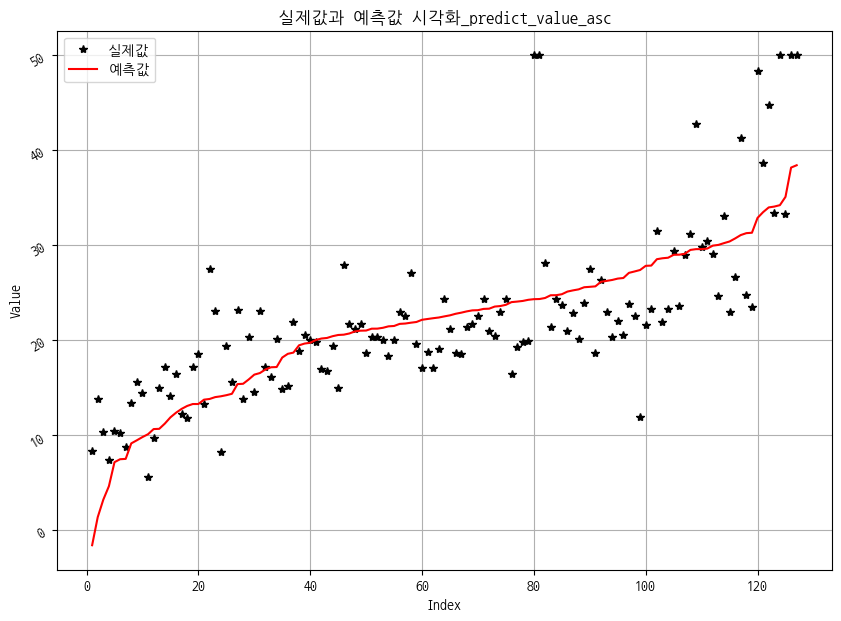

In [17]:
# 테스트 데이터의 레이블(실제값)과 예측값 시각화
plt.figure(figsize=[10, 7])
idx = np.arange(1, (len(df_sort) + 1))
plt.plot(idx, df_sort.real_value , "k*" ,label="실제값")
plt.plot(idx, df_sort.predict_value, "r-" ,label="예측값")
plt.title("실제값과 예측값 시각화_predict_value_asc")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.yticks(rotation=30)
plt.show()
# 정확도 시각화 결과, epoch 진행 단계별로 전반적인 정확도가 상승하는 것을 볼 수 있다.